In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_data, train_targets), (test_data, test_targets) =keras.datasets.boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [5]:
train_data.shape

(404, 13)

In [36]:
model = models.Sequential()

In [37]:
from tensorflow.keras import regularizers

In [38]:
l1 = regularizers.L1(l1=0.01)
l2 = regularizers.L2(l2=0.01)

In [39]:
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l1, input_shape=(train_data.shape[1],)))

In [40]:
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=l2))

In [41]:
model.add(layers.Dense(1))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [43]:
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.85, momentum=0.9)

In [44]:
model.compile(optimizer=rmsprop, loss='mse')

In [45]:
# model.fit(train_data, train_targets, epochs=80, batch_size=16)
history = model.fit(train_data, train_targets, epochs=80, batch_size=64)

Epoch 1/80
7/7 [==============================] - 0s 2ms/step - loss: 531.0895
Epoch 2/80
7/7 [==============================] - 0s 1ms/step - loss: 232.8217
Epoch 3/80
7/7 [==============================] - 0s 1ms/step - loss: 152.7221
Epoch 4/80
7/7 [==============================] - 0s 1ms/step - loss: 48.8315
Epoch 5/80
7/7 [==============================] - 0s 2ms/step - loss: 34.9599
Epoch 6/80
7/7 [==============================] - 0s 2ms/step - loss: 23.6060
Epoch 7/80
7/7 [==============================] - 0s 3ms/step - loss: 18.1339
Epoch 8/80
7/7 [==============================] - 0s 1ms/step - loss: 16.2203
Epoch 9/80
7/7 [==============================] - 0s 2ms/step - loss: 14.2120
Epoch 10/80
7/7 [==============================] - 0s 2ms/step - loss: 13.6625
Epoch 11/80
7/7 [==============================] - 0s 2ms/step - loss: 13.2031
Epoch 12/80
7/7 [==============================] - 0s 2ms/step - loss: 12.1827
Epoch 13/80
7/7 [==============================] - 0s 2ms/

## Loss 값 변화 살펴보기

In [16]:
import matplotlib.pyplot as plt

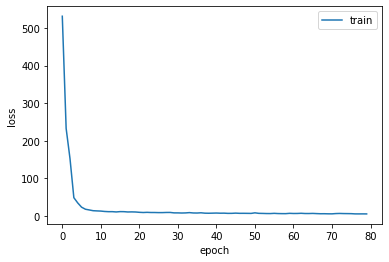

In [46]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# 성능 평가하기

In [47]:
y_pred = model.predict(test_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(test_targets, y_pred)**0.5

4/4 [==============================] - 0s 1ms/step


3.7963605163276837

In [48]:
from sklearn.metrics import r2_score
r2_score(test_targets, y_pred)

0.8268658474325136